# SWMT time series all models

In [14]:
import intake
import glob

import dask.distributed
import gsw
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [3]:
#Starting a dask client
from os import environ
environ["PYTHONWARNINGS"] = "ignore"

from dask.distributed import Client
client = Client(threads_per_worker = 1)

### Importing the data

In [8]:
acc_anom.to_netcdf('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_ACCESS_SWMT_shelf/timeseries/swmt_shelf_time_access_anom.nc')

In [9]:
pan01_anom = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/SWMT_timeseries/swmt_shelf_time_pan01_anom.nc', chunks = 'auto') 
#pan005_botsalt_anom = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/sic_shelf_anom_pan005.nc', chunks = 'auto')
acc_anom = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_ACCESS_SWMT_shelf/timeseries/swmt_shelf_time_access_anom.nc', chunks = 'auto') 

In [10]:
pan01_anom_new = pan01_anom.to_series()
#pan005_anom_new = pan005_anom.to_series()
acc_anom_new = acc_anom.to_series()

### Plotting

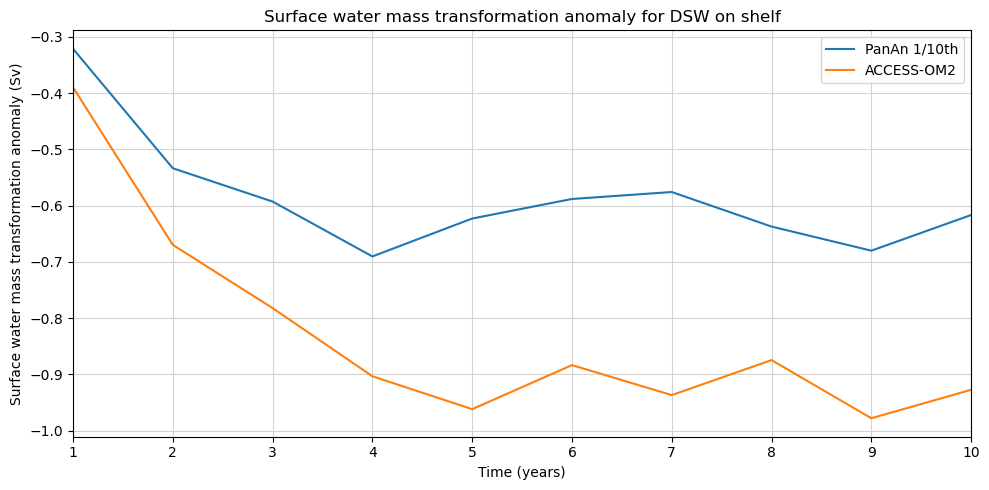

In [20]:
# Note, the '+1' is to make the data go from 1-10 instead of 0-9. 
plt.figure(figsize=(10, 5))
plt.plot(pan01_anom_new.index + 1, pan01_anom_new.values, label='PanAn 1/10th')
# plt.plot(pan005_anom_new.index + 1, pan005_anom_new.values, label='PanAn 1/20th')
plt.plot(acc_anom_new.index + 1, acc_anom_new.values, label='ACCESS-OM2')

# Labeling and formatting
plt.xlim(1, 10)
plt.xlabel('Time (years)')
plt.ylabel("Surface water mass transformation anomaly (Sv)")
plt.title('Surface water mass transformation anomaly for DSW on shelf')
plt.legend()
plt.grid(True, color='lightgrey')
plt.tight_layout()
plt.show()